# Comparing the sorted dictionary of the $p$-centrality function with sorted dictionaries of other centrality measures
Table 1 in the article is based on this notebook

In [1]:
from mygraph import MyGraph
from helpers import *

In [2]:
# Building the graph 
myg = MyGraph()
edge_list = [("A", "B"), ("A", "C"), ("A", "J"), ("A", "Y"), ("A", "H"), ("Y", "I"), ("Y", "L"), ("Y", "H"),  
             ("I", "K"), ("B", "E"), ("B", "D"), ("D", "R"), ("D", "Q"), ("C", "F"), ("F", "E"), ("E", "D"), 
             ("L", "K"), ("K", "P"), ("H", "I"), ("H", "M"), ("M", "N"), ("N", "K") ]
myg.from_edge_list(edge_list)

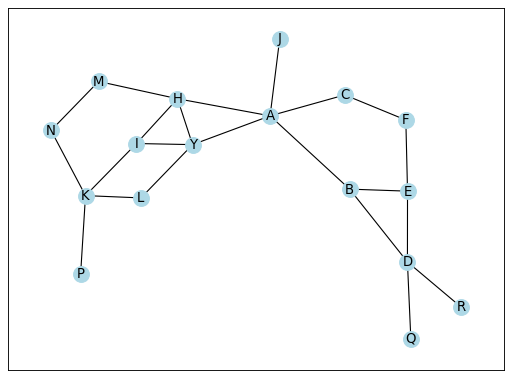

In [3]:
# drawing the graph
dg(myg)

In [4]:
# making a copy of the graph myg as an object of the class Graph in NetworkX
nxg = copy_my_graph(myg)

In [5]:
closeness = nx.closeness_centrality(nxg)
closeness

{'A': 0.48484848484848486,
 'B': 0.41025641025641024,
 'C': 0.35555555555555557,
 'J': 0.3333333333333333,
 'Y': 0.43243243243243246,
 'H': 0.4444444444444444,
 'I': 0.36363636363636365,
 'L': 0.34782608695652173,
 'K': 0.3076923076923077,
 'E': 0.3333333333333333,
 'D': 0.3333333333333333,
 'R': 0.25396825396825395,
 'Q': 0.25396825396825395,
 'F': 0.3137254901960784,
 'P': 0.23880597014925373,
 'M': 0.3404255319148936,
 'N': 0.2909090909090909}

In [6]:
betweenness = nx.betweenness_centrality(nxg)
betweenness

{'A': 0.6125,
 'B': 0.3458333333333333,
 'C': 0.08333333333333333,
 'J': 0.0,
 'Y': 0.22916666666666669,
 'H': 0.26111111111111107,
 'I': 0.12777777777777774,
 'L': 0.0611111111111111,
 'K': 0.15555555555555553,
 'E': 0.04583333333333333,
 'D': 0.24166666666666667,
 'R': 0.0,
 'Q': 0.0,
 'F': 0.020833333333333332,
 'P': 0.0,
 'M': 0.0861111111111111,
 'N': 0.020833333333333332}

In [7]:
eigenvector = nx.eigenvector_centrality(nxg)
eigenvector

{'A': 0.43653941329712925,
 'B': 0.2241305910015961,
 'C': 0.16542765728436498,
 'J': 0.1356201478801634,
 'Y': 0.4442827799392666,
 'H': 0.43568933650953623,
 'I': 0.34660304865150937,
 'L': 0.2112474695862857,
 'K': 0.23569216749780525,
 'E': 0.14339886309964028,
 'D': 0.14149690636097173,
 'R': 0.043959821479559805,
 'Q': 0.043959821479559805,
 'F': 0.09594436979585431,
 'P': 0.07322218344166917,
 'M': 0.1749928878079135,
 'N': 0.12758711598884365}

In [8]:
def p_centrality(myg, p, radius, normalizing_factor):
    """
    myg: a MyGraph object 
    p: a real number 0 < p < 1
    radius: the maxinum radius of circles around a node that are used to compute the p-centrality function
    normalizing_factor: the normalizing factor to make the p-centrality function comparable with closeness centrality
    returns: a dictionary whose keys are the nodes of the graph and the values are the p-centrality function of the corresponding node
    """
    ppc = {}
    for node in myg.get_vertex_list():
        circles = myg.circles(node, radius=radius)
        val = 0
        for i in range(radius):
            if i + 1 <= len(circles) - 1:
                val += len(circles[i+1])* p**i
        ppc[node] = val/normalizing_factor
    return ppc

In [9]:
def sort_dict(d):
    sorted_d = dict(sorted(d.items(), key=lambda kv: round(kv[1], 3), reverse=True))
    sorted_d = {x:round(sorted_d[x], 3) for x in sorted_d }
    return sorted_d

In [10]:
ppc = p_centrality(myg, 0.6, 7, 21.15)
ppc

{'A': 0.4849172576832151,
 'B': 0.4180425531914895,
 'C': 0.3514704491725768,
 'J': 0.3098628841607565,
 'Y': 0.436501182033097,
 'H': 0.44784869976359337,
 'I': 0.377645390070922,
 'L': 0.3473853427895981,
 'K': 0.3476274231678487,
 'E': 0.3529531914893617,
 'D': 0.3605182033096927,
 'R': 0.23522345153664298,
 'Q': 0.23522345153664298,
 'F': 0.3113456264775413,
 'P': 0.22748898345153665,
 'M': 0.3360378250591017,
 'N': 0.2984548463356974}

In [11]:
print("Closeness Centrality:")
print_dict(sort_dict(closeness), keys_len=5)

Closeness Centrality:
A     0.485 
H     0.444 
Y     0.432 
B     0.41 
I     0.364 
C     0.356 
L     0.348 
M     0.34 
J     0.333 
E     0.333 
D     0.333 
F     0.314 
K     0.308 
N     0.291 
R     0.254 
Q     0.254 
P     0.239 


In [12]:
print("p-Centrality Function:")
print_dict(sort_dict(ppc), keys_len=5)

p-Centrality Function:
A     0.485 
H     0.448 
Y     0.437 
B     0.418 
I     0.378 
D     0.361 
E     0.353 
C     0.351 
K     0.348 
L     0.347 
M     0.336 
F     0.311 
J     0.31 
N     0.298 
R     0.235 
Q     0.235 
P     0.227 


In [13]:
print("Eigenvector Centrality:")
print_dict(sort_dict(eigenvector), keys_len=5)

Eigenvector Centrality:
Y     0.444 
A     0.437 
H     0.436 
I     0.347 
K     0.236 
B     0.224 
L     0.211 
M     0.175 
C     0.165 
E     0.143 
D     0.141 
J     0.136 
N     0.128 
F     0.096 
P     0.073 
R     0.044 
Q     0.044 


In [14]:
print("Betwnness Centrality:")
print_dict(sort_dict(betweenness), keys_len=5)

Betwnness Centrality:
A     0.613 
B     0.346 
H     0.261 
D     0.242 
Y     0.229 
K     0.156 
I     0.128 
M     0.086 
C     0.083 
L     0.061 
E     0.046 
F     0.021 
N     0.021 
J     0.0 
R     0.0 
Q     0.0 
P     0.0 
